In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0]
])


In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [4]:
np.random.seed(42)

W1 = np.random.randn(2, 2)   
b1 = np.zeros((1, 2))

W2 = np.random.randn(2, 1)   
b2 = np.zeros((1, 1))

learning_rate = 0.1


In [5]:
losses = []

for epoch in range(200):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)

    # Loss
    loss = mse(y, output)
    losses.append(loss)

    # Backpropagation
    d_output = (output - y) * sigmoid_derivative(output)

    dW2 = np.dot(a1.T, d_output)
    db2 = np.sum(d_output, axis=0, keepdims=True)

    d_hidden = np.dot(d_output, W2.T) * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, d_hidden)
    db1 = np.sum(d_hidden, axis=0, keepdims=True)

    # Update weights
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1


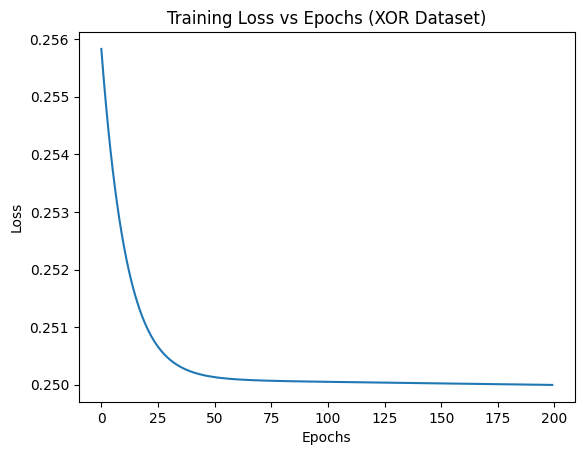

In [6]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Epochs (XOR Dataset)")
plt.show()


In [7]:
## Task 2: Custom Activation Function & Performance Comparison


In [8]:
def sinlu(x):
    return np.where(x > 0, x, np.sin(x))

def sinlu_derivative(x):
    return np.where(x > 0, 1, np.cos(x))


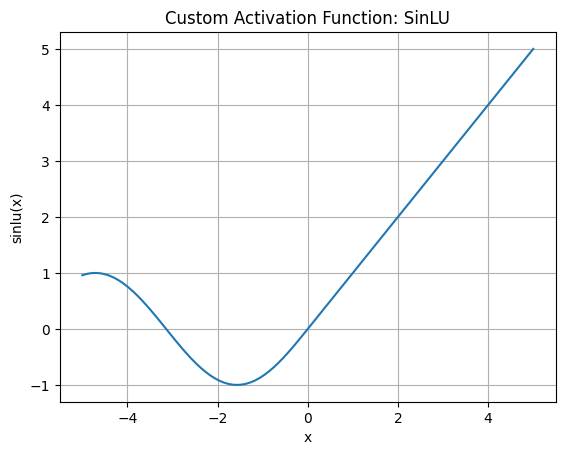

In [9]:
x_vals = np.linspace(-5, 5, 100)
y_vals = sinlu(x_vals)

plt.plot(x_vals, y_vals)
plt.xlabel("x")
plt.ylabel("sinlu(x)")
plt.title("Custom Activation Function: SinLU")
plt.grid()
plt.show()


In [10]:
def train_model(activation, activation_derivative):
    W1 = np.random.randn(2, 2)
    b1 = np.zeros((1, 2))
    W2 = np.random.randn(2, 1)
    b2 = np.zeros((1, 1))
    lr = 0.1

    losses = []

    for _ in range(200):
        z1 = np.dot(X, W1) + b1
        a1 = activation(z1)

        z2 = np.dot(a1, W2) + b2
        output = sigmoid(z2)

        loss = mse(y, output)
        losses.append(loss)

        d_output = (output - y) * sigmoid_derivative(output)
        dW2 = np.dot(a1.T, d_output)

        d_hidden = np.dot(d_output, W2.T) * activation_derivative(z1)
        dW1 = np.dot(X.T, d_hidden)

        W2 -= lr * dW2
        W1 -= lr * dW1

    return losses


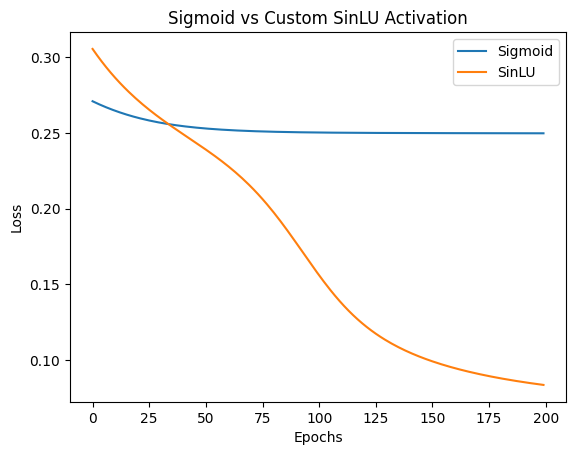

In [11]:
loss_sigmoid = train_model(sigmoid, sigmoid_derivative)
loss_sinlu = train_model(sinlu, sinlu_derivative)

plt.plot(loss_sigmoid, label="Sigmoid")
plt.plot(loss_sinlu, label="SinLU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Sigmoid vs Custom SinLU Activation")
plt.legend()
plt.show()
